# Music Genre Classification Project Using Machine Learning Techniques

### Table of Contents

1. Problem Definition
2. Project Overview
3. System Prerequisites
    - Overview of Dataset
    - Libraries Installation
4. Implementation
5. Test New Audio Files
6. Conclusion


*soundwave* 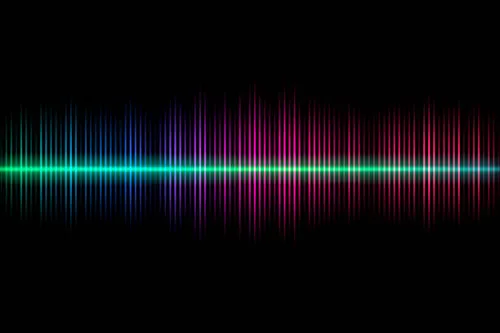

### Problem Definition

Audio processing is a notably intricate area in data science, often more challenging than image processing and other classification methods. One significant application is music genre classification, which seeks to categorize audio files according to their respective sound types. This task demands automation to minimize human error and save time, as manual classification would require listening to each file in its entirety. Therefore, to streamline this process, we employ machine learning and deep learning algorithms.

The project aimed to classify music genres based on audio features extracted from music files in WAV format. Ten genres were considered: Blues, Hip-hop, Classical, Pop, Disco, Country, Metal, Jazz, Reggae, and Rock.

### Project Overview and Approach

In short, we can define our project problem statement as like given multiple audio files, and the task is to categorize each audio file in a certain category like audio belongs to Disco, hip-hop, etc. 

The algorithm to be used is 

#### K-Nearest Neighbour 
KNN is a machine learning algorithm used for regression, and classification. It is also known as the lazy learner algorithm. It simply uses a distance-based method o find the K number of similar neighbours to new data and the class in which the majority of neighbours lies, it results in that class as an output. Now let us get our system ready for project implementation.

#### Other alternatives:

- Multiclass support vector machine
- K-means clustering algorithm
- Convolutional neural network

### Dataset Overview

The dataset to be used is named the GTZAN genre collection dataset which is a very popular audio collection dataset. It contains approximately 1000 audio files that belong to 10 different classes. Each audio file is in .wav format (extension). The classes to which audio files belong are Blues, Hip-hop, classical, pop, Disco, Country, Metal, Jazz, Reggae, and Rock.
(https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)


### Libraries Installation

Beyond usuall ML libraries, for this project are neede:
- the python speech feature library to extract features 
- the scipy library to load the dataset in the WAV format

!pip install python_speech_features

!pip install scipy

## Implementation

In [2]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator

#### Define a function to calculate distance between feature vectors and to find neighbours.

In [4]:

def getNeighbors(trainingset, instance, k):
    distances = []
    for x in range(len(trainingset)):
        dist = distance(trainingset[x], instance, k) + distance(instance,trainingset[x],k)
        distances.append((trainingset[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

#### Identify the class of nearest neighbours

In [6]:
#function to identify the nearest neighbors

def nearestclass(neighbors):
    classVote = {}
    
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
            
    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return sorter[0][0]

#### Model Evaluation

In [7]:
# fuction for model evaluation

def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == prediction[x]:
            correct += 1
    return 1.0 * correct / len(testSet)

In [12]:
# Directory where audio files are stored
directory = 'C:/Users/fanis/Downloads/Big Data/archive/Data/genres_original'

# Open a binary file to save the dataset
with open("mydataset.dat", "wb") as f:
    genre_index = 0  # Initialize genre index
    # Iterate over each folder in the directory
    for genre_folder in os.listdir(directory):
        genre_index += 1
        if genre_index == 11:
            break  # Limit to 10 genres
        
        genre_path = os.path.join(directory, genre_folder)
        # Iterate over each file in the genre folder
        for audio_file in os.listdir(genre_path):
            file_path = os.path.join(genre_path, audio_file)
            try:
                # Read the audio file
                rate, sig = wav.read(file_path)
                
                # Extract MFCC features
                mfcc_feat = mfcc(sig, rate, winlen=0.020, appendEnergy=False)
                covariance = np.cov(np.matrix.transpose(mfcc_feat))
                mean_matrix = mfcc_feat.mean(axis=0)
                
                # Create a feature tuple (mean, covariance, genre index)
                feature = (mean_matrix, covariance, genre_index)
                
                # Save the feature using pickle
                pickle.dump(feature, f)
            
            except ValueError as e:
                print(f"Skipping file {file_path}: {e}")
            except Exception as e:
                print(f"Got an exception: {e} in folder: {genre_folder} filename: {audio_file}")
f.close()

Skipping file C:/Users/fanis/Downloads/Big Data/archive/Data/genres_original\jazz\jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.


#### Train-test split the dataset

In [15]:
dataset = []

def loadDataset(filename, split, trset, teset):
    with open('mydataset.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trset.append(dataset[x])
        else:
            teset.append(dataset[x])

trainingSet = []
testSet = []
loadDataset('mydataset.dat', 0.68, trainingSet, testSet)

In [16]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

In [17]:
# Make the prediction using KNN(K nearest Neighbors)
length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 5)))

accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)

0.7161290322580646


#### Test the Classifier with the new Audio File

In [18]:
from collections import defaultdict

results = defaultdict(int)

directory = "C:/Users/fanis/Downloads/Big Data/archive/Data/genres_original"

i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1

In [24]:
pred = nearestclass(getNeighbors(dataset, feature, 5))
print(results[pred])

rock


## Exploratory Data Analysis (EDA)

### Visualize the Distribution of Audio Files Across Different Genres 
#### Devoid of significance since each file contains the same amout (100) of files

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

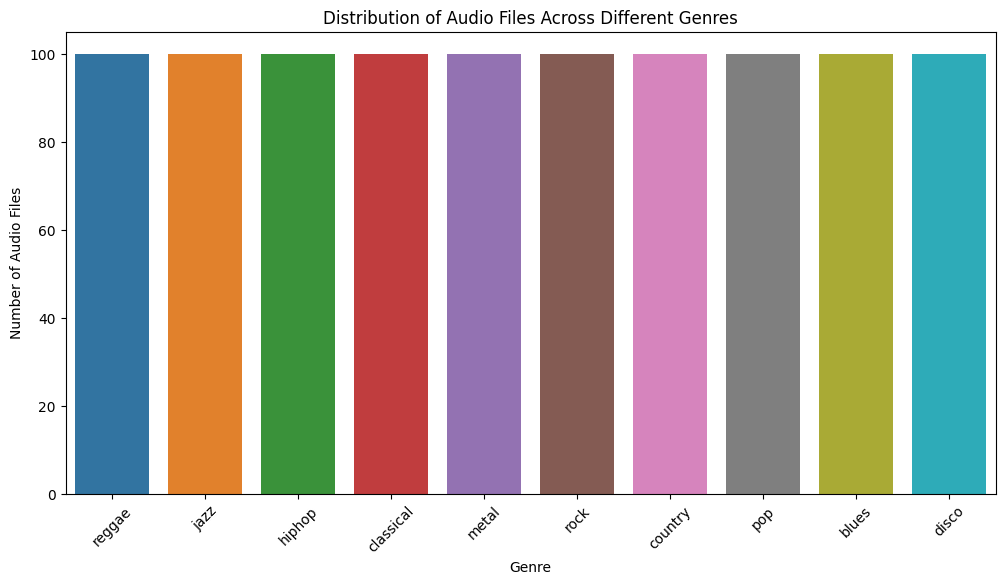

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Path to the CSV file
csv_path = 'C:/Users/fanis/Downloads/Big Data/archive/Data/features_30_sec.csv'

# Load the CSV file
data = pd.read_csv(csv_path)

# Check the first few rows of the dataframe
print(data.head())

# Count the number of files in each genre
genre_counts = data['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Audio Files')
plt.title('Distribution of Audio Files Across Different Genres')
plt.xticks(rotation=45)
plt.show()


### Feature Analysis: Plot Sample Waveforms and Their Corresponding MFCC Features

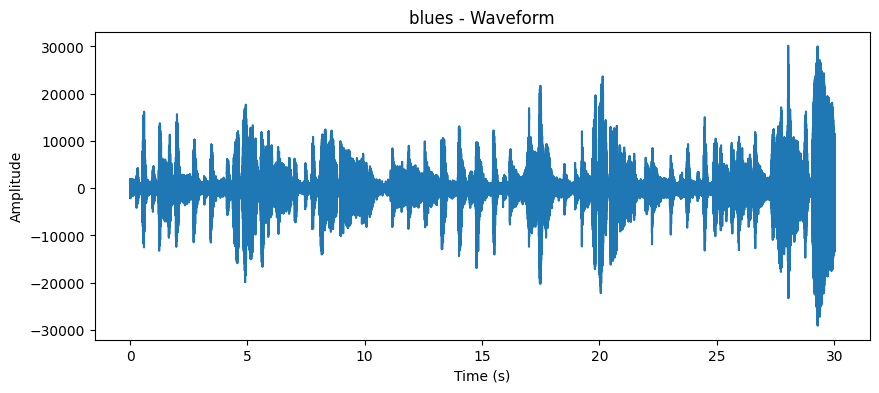

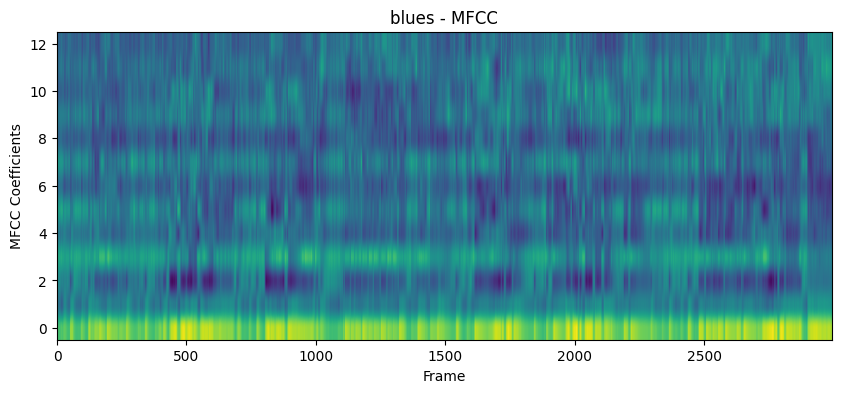

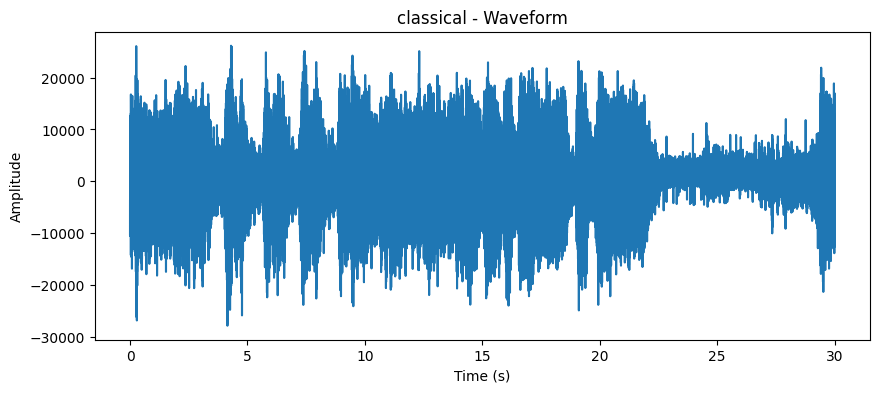

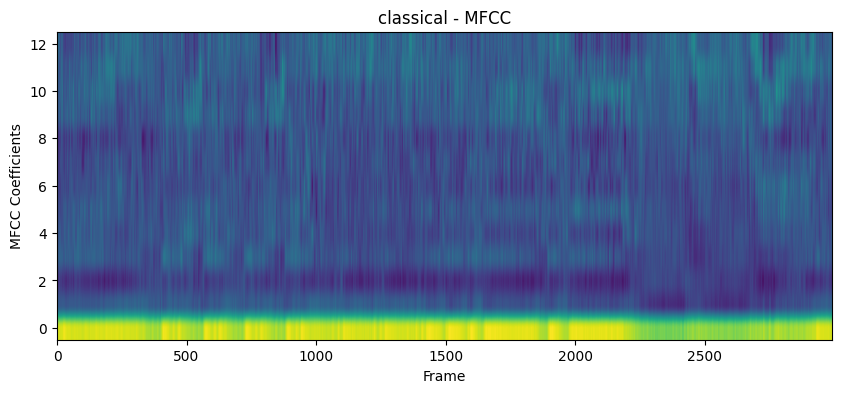

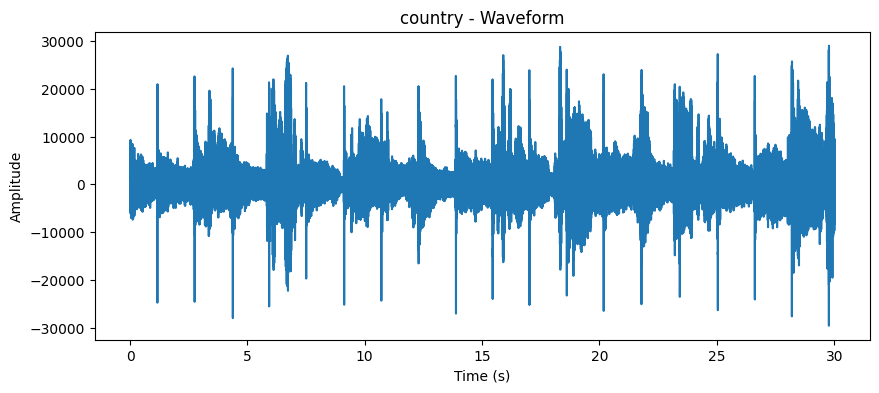

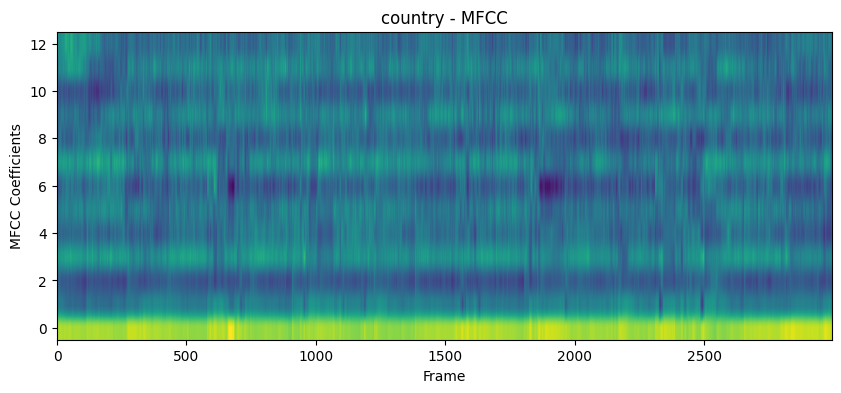

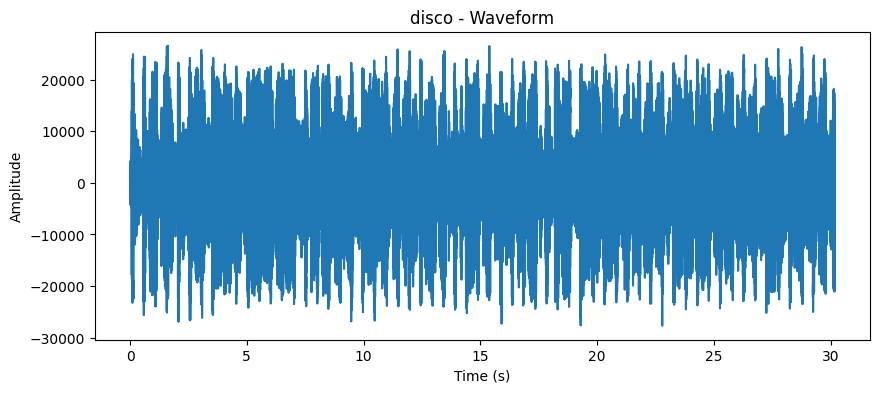

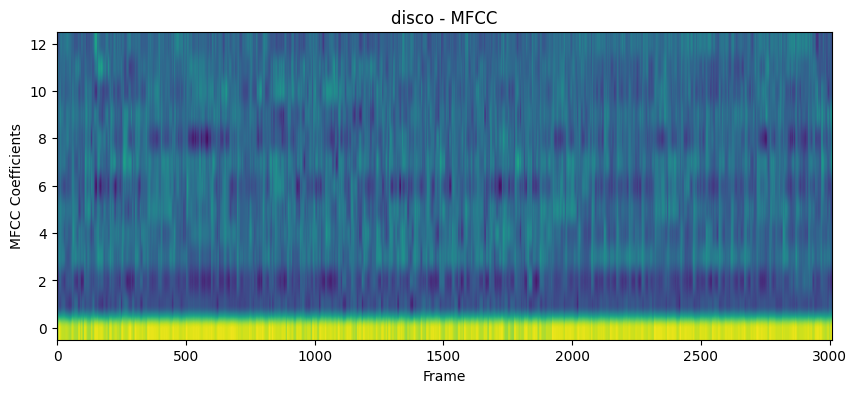

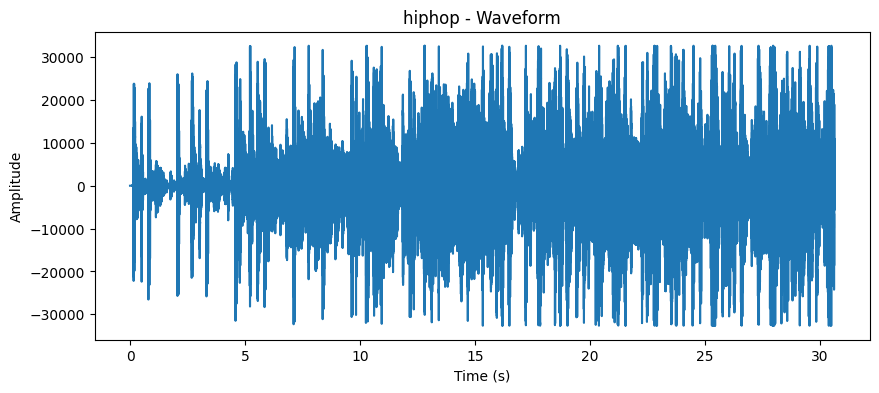

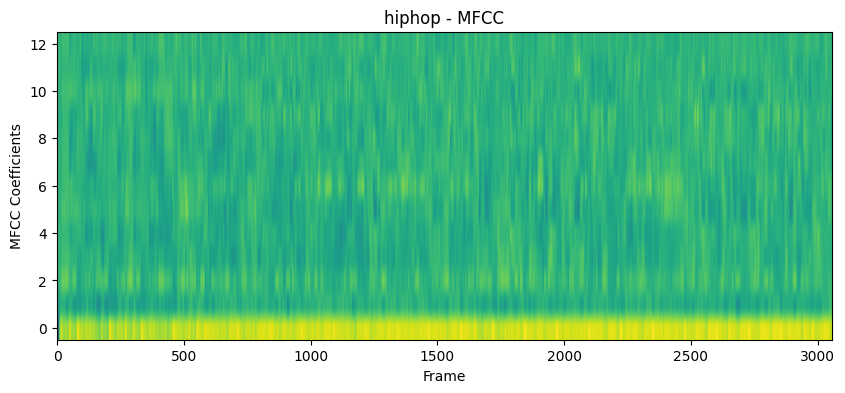

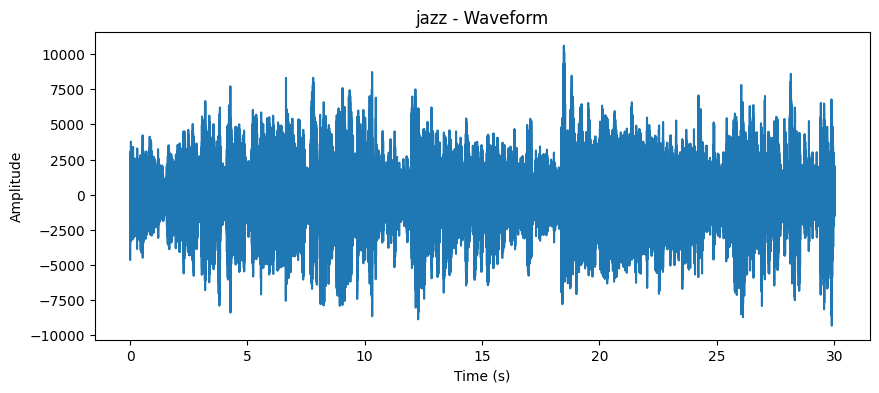

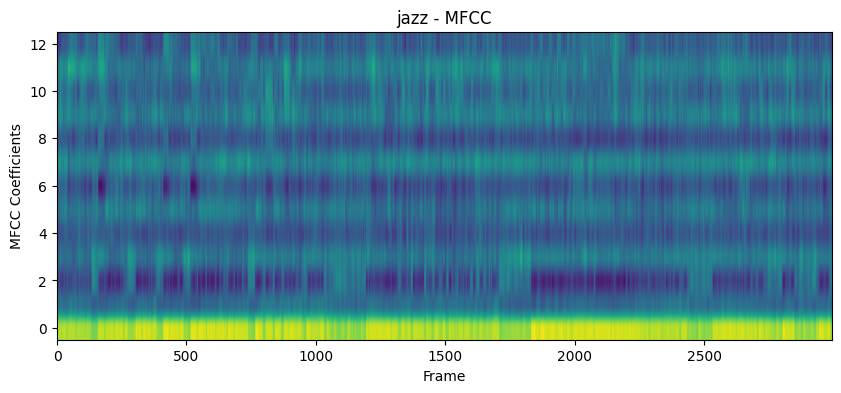

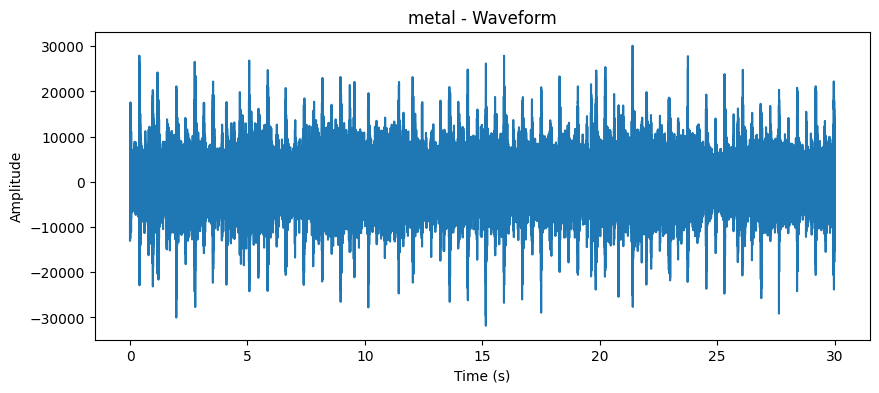

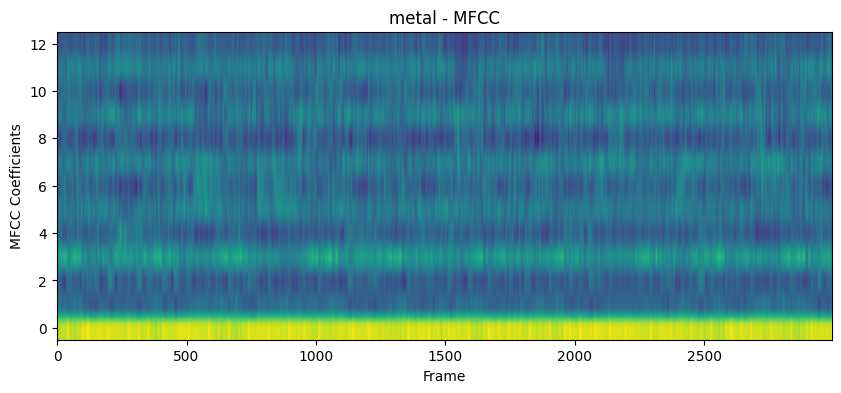

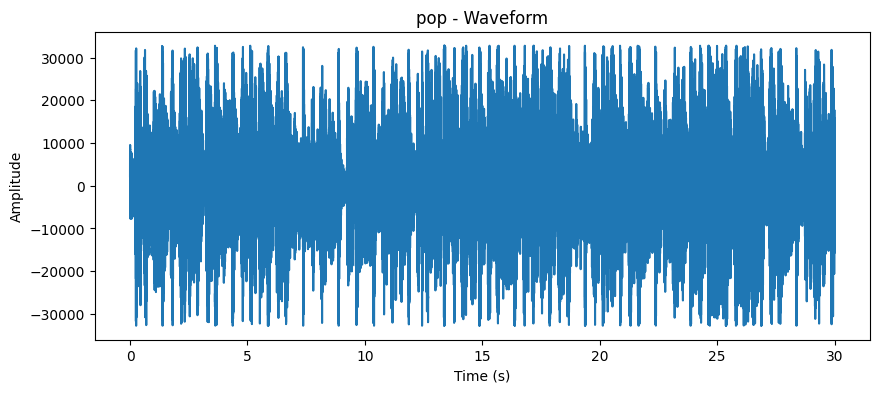

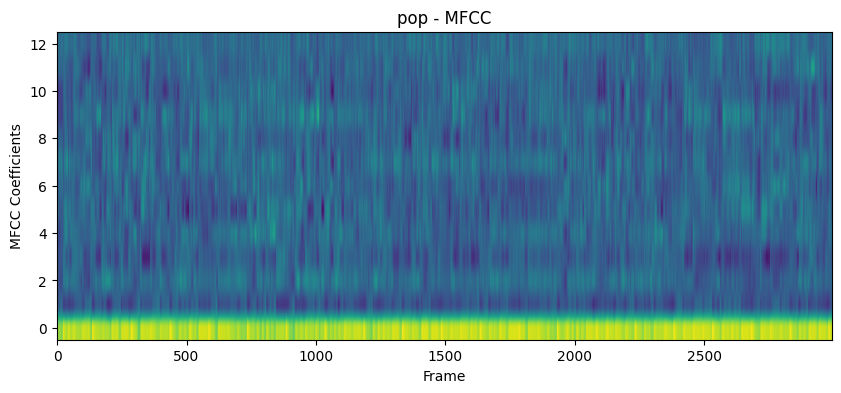

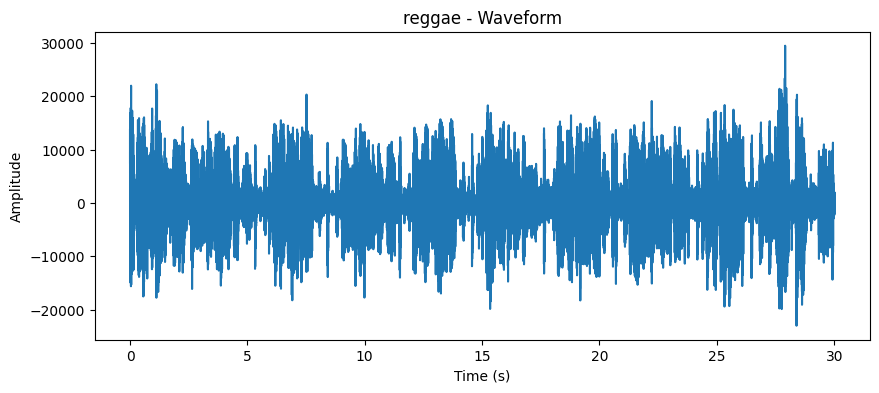

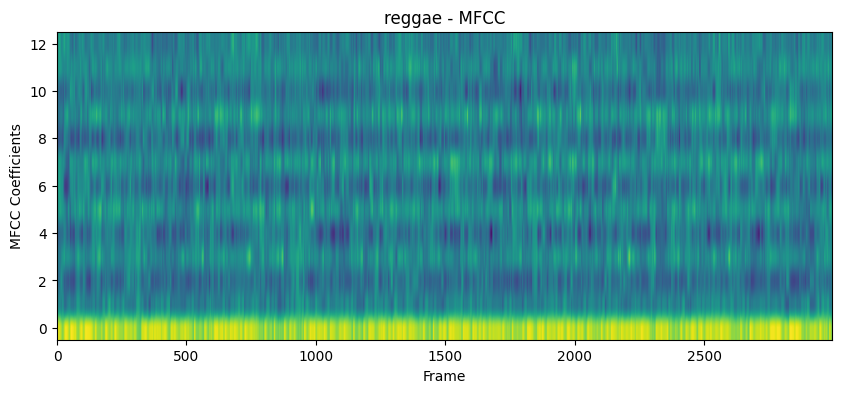

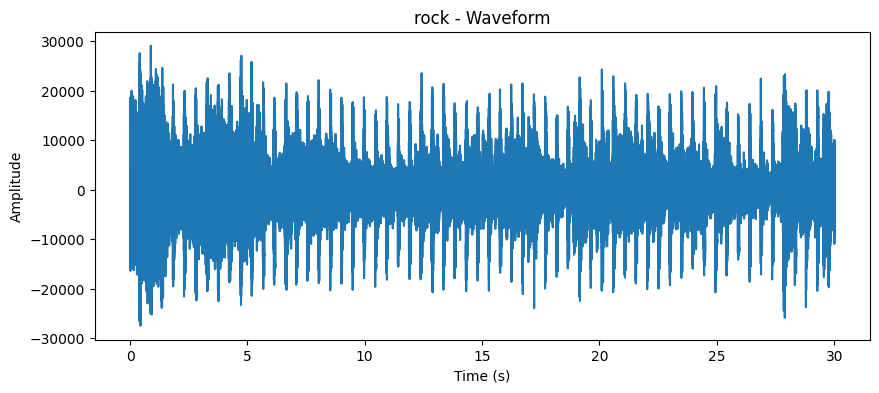

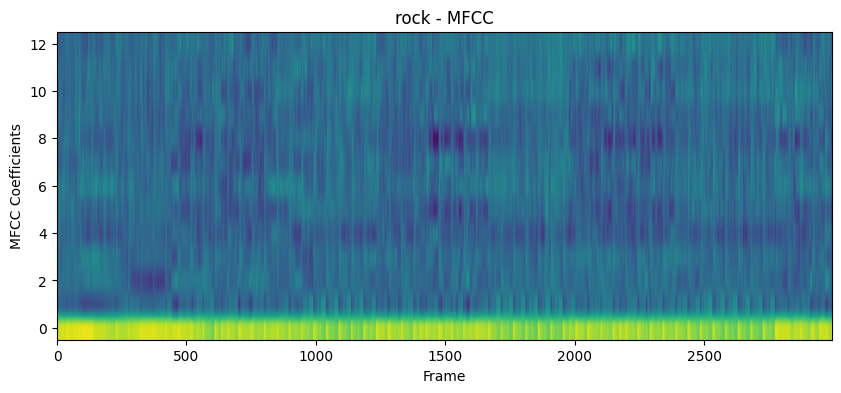

In [26]:
import random

# Function to plot waveform
def plot_waveform(rate, signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(signal) / rate, num=len(signal)), signal)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Function to plot MFCC
def plot_mfcc(rate, signal, title):
    mfcc_features = mfcc(signal, rate, winlen=0.020, appendEnergy=False)
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(mfcc_features), aspect='auto', origin='lower')
    plt.title(title)
    plt.xlabel('Frame')
    plt.ylabel('MFCC Coefficients')
    plt.show()

# Plot waveforms and MFCCs for a random file from each genre
for genre_folder in os.listdir(directory):
    genre_path = os.path.join(directory, genre_folder)
    audio_file = random.choice(os.listdir(genre_path))
    file_path = os.path.join(genre_path, audio_file)
    
    rate, signal = wav.read(file_path)
    plot_waveform(rate, signal, f'{genre_folder} - Waveform')
    plot_mfcc(rate, signal, f'{genre_folder} - MFCC')


### Correlation Analysis: Correlations Between Different Features Extracted from the Audio Data

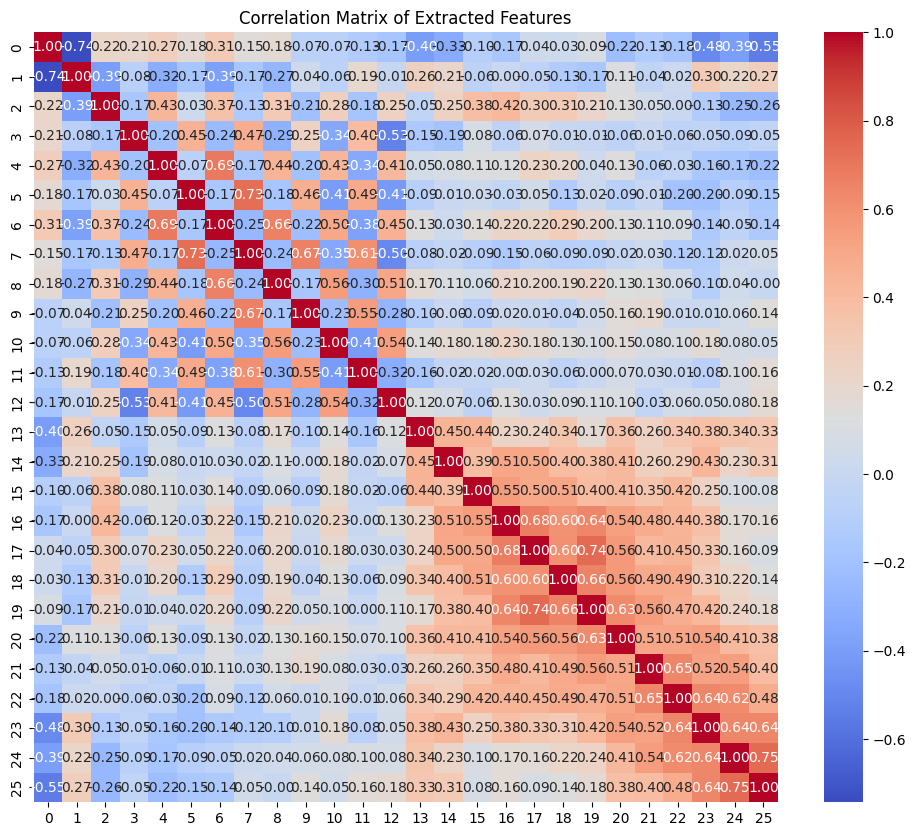

In [27]:
import numpy as np
import pandas as pd

# Function to extract features
def extract_features(file_path):
    rate, signal = wav.read(file_path)
    mfcc_features = mfcc(signal, rate, winlen=0.020, appendEnergy=False)
    mfcc_mean = np.mean(mfcc_features, axis=0)
    mfcc_variance = np.var(mfcc_features, axis=0)
    return np.hstack([mfcc_mean, mfcc_variance])

# Extract features for a subset of files
feature_list = []
genre_list = []
for genre_folder in os.listdir(directory):
    genre_path = os.path.join(directory, genre_folder)
    for audio_file in random.sample(os.listdir(genre_path), 10):  # Sample of 10 files per genre
        file_path = os.path.join(genre_path, audio_file)
        features = extract_features(file_path)
        feature_list.append(features)
        genre_list.append(genre_folder)

# Create a DataFrame
feature_df = pd.DataFrame(feature_list)
feature_df['genre'] = genre_list

# Compute the correlation matrix
corr_matrix = feature_df.iloc[:, :-1].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Extracted Features')
plt.show()


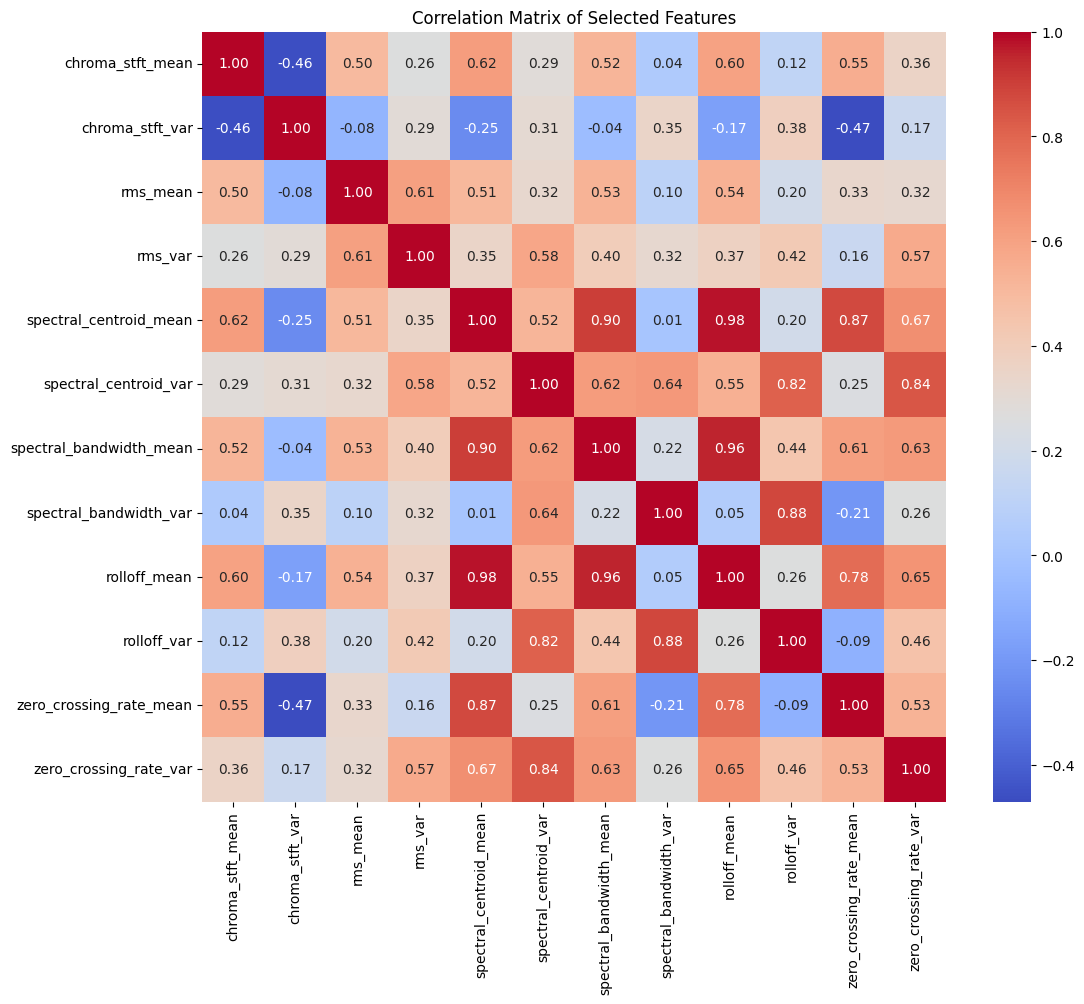

In [31]:
import seaborn as sns

# Path to the CSV file
csv_path = 'C:/Users/fanis/Downloads/Big Data/archive/Data/features_30_sec.csv'

# Load the CSV file
data = pd.read_csv(csv_path)

# Select subset of features for correlation matrix (adjust as needed)
selected_features = [
    'chroma_stft_mean', 'chroma_stft_var',
    'rms_mean', 'rms_var',
    'spectral_centroid_mean', 'spectral_centroid_var',
    'spectral_bandwidth_mean', 'spectral_bandwidth_var',
    'rolloff_mean', 'rolloff_var',
    'zero_crossing_rate_mean', 'zero_crossing_rate_var'
]

# Create a subset DataFrame with selected features
subset_data = data[selected_features]

# Compute the correlation matrix
corr_matrix = subset_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()



### Hyperparameter Tuning with GridSearchCV

In [32]:
# Path to the CSV file
csv_path = 'C:/Users/fanis/Downloads/Big Data/archive/Data/features_30_sec.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(csv_path)

# Check the columns to identify feature and label columns
print(data.columns)

# Define X (features) and y (labels)
X = data.drop(['filename', 'label'], axis=1)  # Drop non-numerical and label columns
y = data['label']

# Check the shape to ensure correct definition
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Path to the CSV file
csv_path = 'C:/Users/fanis/Downloads/Big Data/archive/Data/features_30_sec.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(csv_path)

# Define X (features) and y (labels)
X = data.drop(['filename', 'label'], axis=1)  # Drop non-numerical and label columns
y = data['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\fanis\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-validation Accuracy: 0.78625
Test Set Accuracy: 0.755


## Overview

### Model Training and Evaluation

- Implemented a K-Nearest Neighbors (KNN) classifier for baseline classification.
- Utilized GridSearchCV for hyperparameter tuning of a RandomForestClassifier.
- Achieved the best cross-validation accuracy of 78.625% with the RandomForestClassifier using the following parameters:
    - max_depth: None
    - max_features: 'auto'
    - min_samples_leaf: 1
    - min_samples_split: 5
    - n_estimators: 300
- Evaluated the best model on the test set, achieving an accuracy of 75.5%.

### Improvements for future implementations

- Advanced Feature Extraction: Advanced audio feature extraction techniques beyond MFCCs, such as spectral contrast, chroma frequencies, and rhythmic patterns (tempo, beats).
- Deep Learning Models: Deep learning models like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs), can learn hierarchical features directly from raw audio data.
- Data Augmentation: Data augmentation techniques can create variations of existing audio data, such as pitch shifting, time stretching, and adding noise. 
- Cross-validation: Cross-validation techniques like stratified k-fold cross-validation would ensure robust evaluation of model performance.

### Conclusion

The project successfully classified music genres with a significant accuracy rate, demonstrating the effectiveness of feature extraction and machine learning algorithms in audio classification tasks. Future enhancements could involve exploring more advanced feature extraction techniques, incorporating deep learning models, and expanding the dataset for robustness.

This project is showcasing successfully a comprehensive approach to solving the music genre classification problem using AI and machine learning methodologies.